In [65]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [66]:
import sys
sys.path.append('/gdrive/My Drive/2nd Sem/IBM/Covid Project/Code/Scraping Twitter Data')

In [67]:
import copy
import tweepy
import private
import numpy as np
import pandas as pd

In [68]:
auth = tweepy.OAuthHandler(private.CONSUMER_KEY, private.CONSUMER_SECRET)
auth.set_access_token(private.OAUTH_TOKEN, private.OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [69]:
df = pd.read_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Scraping Tweets Demo/covid_tweets_with_user_features.csv")
df

,tweet_id,tweet_text,tweet_link,desc,real_name,user_handle,user_id,chars_in_desc,chars_in_real_name,chars_in_user_handle,num_matches,total_urls_in_desc,official_url_exists,followers_count,friends_count,listed_count,favourites_count,geo_enabled,acc_created_on,acc_life,verified,num_tweets,protected,posting_frequency,latest_tweet_time,activity,avg_likes_per_tweet,follower_friends_ratio,too_much_cleaned_tweet,label
0,1277551535367401473,@himantabiswa বহুত হ’ল covid show .আৰু নকৰিব ৷...,http://twitter.com/anyuser/status/127755153536...,hardworking makes a man perfect,Utpal Patowary,UtpalPatowary7,1131532751084052481,31,14,14,3,0,0,0,25,0,47,0,"['Thu', 'May', '23', '12:10:05', '+0000', '2019']",403,0,14,0,0.034739,"['Mon', 'Jun', '29', '10:47:18', '+0000', '2020']",0,3.357143,0.000000,বহুত হ’ল show .আৰু নকৰিব ৷ ৰাইজক আমুৱাইছে ৷ pr...,3
1,1277551271956733954,১৪ শতাংশ কলকাতাবাসীই এখন কোভিড প্রতিরোধে সক্ষম...,http://twitter.com/anyuser/status/127755127195...,Facebook: https://t.co/vQFs4apIJo\nYoutube Cha...,Aajkaal Official,aajkaalofficial,795241907597123584,111,16,15,3,3,1,354,134,1,11,0,"['Sun', 'Nov', '06', '12:30:20', '+0000', '2016']",1331,0,4134,0,3.105935,"['Mon', 'Jun', '29', '10:35:33', '+0000', '2020']",0,0.002661,2.641791,১৪ শতাংশ কলকাতাবাসীই এখন কোভিড প্রতিরোধে সক্ষম...,3
2,1277549778386268165,rt @news18northeast: ‘মই উশাহ ল’ব পৰা নাই দেউত...,http://twitter.com/anyuser/status/127754977838...,NaN,Purbali,Purbali9,1032488013341777925,0,7,8,2,0,0,117,205,0,39,0,"['Thu', 'Aug', '23', '04:41:39', '+0000', '2018']",676,0,89,0,0.131657,"['Mon', 'Jun', '29', '10:30:08', '+0000', '2020']",0,0.438202,0.570732,"‘মই উশাহ ল’ব পৰা নাই দেউতা’, মৃত্যুৰ পূৰ্বে ছে...",3
3,1277549463003754498,ওই ব্যক্তির করোনা পরীক্ষার রিপোর্ট এখনও হাতে আ...,http://twitter.com/anyuser/status/127754946300...,"Official Twitter account of Sangbad Pratidin, ...",Sangbad Pratidin,SangbadPratidin,713644569464705025,124,16,15,3,0,1,20818,216,168,109,1,"['Sat', 'Mar', '26', '08:31:39', '+0000', '2016']",1556,0,46998,0,30.204370,"['Mon', 'Jun', '29', '10:59:15', '+0000', '2020']",0,0.002319,96.379630,ওই ব্যক্তির করোনা পরীক্ষার রিপোর্ট এখনও হাতে আ...,3
4,1277548851516194818,rt @bihuboliya_moi: গুৱাহাটী মহানগৰীত ভয়ংকৰ ৰ...,http://twitter.com/anyuser/status/127754885151...,If our journey is same then why don’t you foll...,Barasha Deka,DekaBarasha9,1245654032867143684,67,12,12,2,0,0,601,483,0,599,0,"['Thu', 'Apr', '02', '10:07:32', '+0000', '2020']",88,0,307,0,3.488636,"['Mon', 'Jun', '29', '10:25:56', '+0000', '2020']",0,1.951140,1.244306,"গুৱাহাটী মহানগৰীত ভয়ংকৰ ৰূপ কোৰোণাৰ, বিগত ২৪ ...",3
5,1277548102237462529,rt @asishsahoo12341: নয়াগ্রাম ব্লক তৃণমূল কংগ...,http://twitter.com/anyuser/status/127754810223...,বাঙ্গলার জয় \nমা মাটি মানুষের জয়,Suman Mahapatra,SumanMa05693443,1121758041731260416,31,15,15,3,0,0,27,45,0,44,0,"['Fri', 'Apr', '26', '12:48:53', '+0000', '2019']",430,0,11,0,0.025581,"['Mon', 'Jun', '29', '10:22:59', '+0000', '2020']",0,4.000000,0.600000,নয়াগ্রাম ব্লক তৃণমূল কংগ্রেসের সম্মানীয় সভাপ...,3
6,1277544765538447360,করোনা পরীক্ষার ফি নির্ধারণ করে পরিপত্র URL cor...,http://twitter.com/anyuser/status/127754476553...,"An interactive, new-generation multimedia news...",Deshe Bideshe,DesheBideshe,401472150,160,13,12,3,0,1,12127,4,21,0,0,"['Sun', 'Oct', '30', '16:03:38', '+0000', '2011']",3165,0,199298,0,62.969352,"['Mon', 'Jun', '29', '11:03:56', '+0000', '2020']",0,0.000000,3031.750000,করোনা পরীক্ষার ফি নির্ধারণ করে পরিপত্র,3
7,1277544295499587584,"rt @pibagartala: covid_19 ২৯ জুন, ২০২০ সকাল ৮....",http://twitter.com/anyuser/status/127754429549...,lam Hritankar Chakraborty . student of Diet ka...,Hritankar Chakraborty,HritankarC,1262775128531914753,78,21,10,3,0,0,26,105,0,1020,0,"['Tue', 'May', '19', '16:00:46', '+0000', '2020']",41,0,1044,0,25.463415,"['Mon', 'Jun', '29', '10:08:01', '+0000', '2020']",0,0.977011,0.247619,"২৯ জুন, ২০২০ সকাল ৮. টা পর্যন্ত ত্রিপুরায় কোভ...",3
8,1277541580270792705,rt @banglargorbomb: নদিয়ার কল্যাণীর কলেজ অফ ম...,http://t

In [60]:
starting_index = 0

In [61]:
counter = 0
for i in range(starting_index,len(df)):

    if(df.iloc[i]['label']==3):

        tweet = api.get_status(df.iloc[i]['tweet_id'],tweet_mode='extended')
        link = "http://twitter.com/anyuser/status/" + tweet.id_str

        print(df.iloc[i]['tweet_text'])
        print(link)

        choice = input("Does the above tweet have a verifiable claim?  (1 --> Yes, 2 --> No, 3 --> Maybe) ")
        if choice!= 3:
            df.at[i,'label'] = choice
        else:
            continue
    counter = counter + 1
    if(counter>=2):
            break 
    

@himantabiswa বহুত হ’ল covid show .আৰু নকৰিব ৷ ৰাইজক আমুৱাইছে ৷ provincialization বিষয়ে সুধিবলৈ বহুজনে আপোনাক অনুৰোধ কৰিছিল ৷ কি কৰিলে আপুনি ? মাত্ৰ এটা বাক্য ৷ সেইবাক্যটোও সম্পূৰ্ণ insult সুৰত সুধিলে আৰু অৱধাৰিত ৰূপত শিক্ষামন্ত্ৰী জনেও দুগুন উৎসাহত insulting reply দিলে ৷
http://twitter.com/anyuser/status/1277551535367401473
Does the above tweet have a verifiable claim?  (1 --> Yes, 2 --> No, 3 --> Maybe) 2
১৪ শতাংশ কলকাতাবাসীই এখন কোভিড প্রতিরোধে সক্ষম, বলছে আইসিএমআর–র সমীক্ষা URL aajkaal URL
http://twitter.com/anyuser/status/1277551271956733954
Does the above tweet have a verifiable claim?  (1 --> Yes, 2 --> No, 3 --> Maybe) 2
rt @news18northeast: ‘মই উশাহ ল’ব পৰা নাই দেউতা’, মৃত্যুৰ পূৰ্বে ছেলফী video কোৰোণা আক্ৰান্ত যুৱকৰ URL
http://twitter.com/anyuser/status/1277549778386268165
Does the above tweet have a verifiable claim?  (1 --> Yes, 2 --> No, 3 --> Maybe) 2


3    10
2     3
Name: label, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f860bf3dba8>]],
      dtype=object)

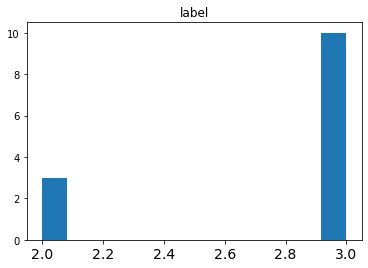

In [62]:
frequencies = df['label'].value_counts()
print(frequencies)

df.hist(column='label',grid=False,bins=12,xlabelsize=14)

In [64]:
df.to_csv("/gdrive/My Drive/2nd Sem/IBM/Covid Project/Dataset/Scraping Tweets Demo/annotated_tweets.csv",index=False)